In [1]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et
from hyperimpute.plugins.utils.metrics import RMSE

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest")
gain = imputers.get("gain")
sinkhorn = imputers.get("sinkhorn")
mean = imputers.get("mean")

D:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
import pandas as pd

df = pd.read_csv("./dataset/Bala_classification_dataset.csv")
df

,Compound,x(BiMe1Me2)O3,Me1,Me2,Me3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number,Formability
0,Bi(GaSc),0.45,Ga,Sc,Ti,0.250000,0.750000,0.0,0.55,0.9813,8.000,3.7395,3.9208,118.9375,No
1,Bi(GaSc),0.40,Ga,Sc,Ti,0.250000,0.750000,0.0,0.60,0.9864,8.000,3.7440,3.9215,119.5000,No
2,Bi(GaSc),0.38,Ga,Sc,Ti,0.250000,0.750000,0.0,0.62,0.9884,8.000,3.7458,3.9218,119.7250,No
3,Bi(GaSc),0.36,Ga,Sc,Ti,0.250000,0.750000,0.0,0.64,0.9904,8.000,3.7476,3.9221,119.9500,No
4,Bi(GaSc),0.30,Ga,Sc,Ti,0.250000,0.750000,0.0,0.70,0.9966,8.000,3.7530,3.9229,120.6250,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,BiScIn,0.37,Sc,In,Ti,0.864865,0.135135,0.0,0.63,0.9831,8.000,3.7347,3.9356,117.2100,Yes
188,BiCoFe,0.70,Co,Fe,Ti,0.270000,0.730000,0.0,0.30,0.9812,11.689,3.8105,3.8481,136.4670,No
189,Bi(GaSc),0.25,Sc,Ga,Ti,0.470000,0.530000,0.0,0.75,1.0057,8.000,3.7715,3.9152,125.5975,Yes
190,BiCoFe,0.20,Co,Fe,Ti,0.880000,0.120000,0.0,0.80,1.0162,9.176,3.7948,3.8905,127.9280,Yes


In [3]:
df = df.select_dtypes(include=["float64", "int64"])
df

,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.45,0.250000,0.750000,0.0,0.55,0.9813,8.000,3.7395,3.9208,118.9375
1,0.40,0.250000,0.750000,0.0,0.60,0.9864,8.000,3.7440,3.9215,119.5000
2,0.38,0.250000,0.750000,0.0,0.62,0.9884,8.000,3.7458,3.9218,119.7250
3,0.36,0.250000,0.750000,0.0,0.64,0.9904,8.000,3.7476,3.9221,119.9500
4,0.30,0.250000,0.750000,0.0,0.70,0.9966,8.000,3.7530,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.37,0.864865,0.135135,0.0,0.63,0.9831,8.000,3.7347,3.9356,117.2100
188,0.70,0.270000,0.730000,0.0,0.30,0.9812,11.689,3.8105,3.8481,136.4670
189,0.25,0.470000,0.530000,0.0,0.75,1.0057,8.000,3.7715,3.9152,125.5975
190,0.20,0.880000,0.120000,0.0,0.80,1.0162,9.176,3.7948,3.8905,127.9280


In [9]:
from hyperimpute.plugins.utils.simulate import simulate_nan
import numpy as np

np.random.seed(0)
X = df
# reindex
cols = X.columns.tolist()
X = np.array(X)

sim_df = simulate_nan(X, 0.1, mecha="MAR")
X = pd.DataFrame(X, columns=cols)
X_with_nan = sim_df["X_incomp"]
mask = sim_df["mask"]
X_with_nan = pd.DataFrame(X_with_nan, columns=cols)
X_with_nan

,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.45,0.250000,0.750000,0.0,0.55,0.9813,NaN,3.7395,3.9208,118.9375
1,0.40,0.250000,0.750000,0.0,0.60,0.9864,8.000,3.7440,3.9215,119.5000
2,0.38,0.250000,0.750000,0.0,0.62,0.9884,8.000,3.7458,3.9218,119.7250
3,0.36,0.250000,0.750000,0.0,0.64,0.9904,8.000,3.7476,3.9221,119.9500
4,0.30,0.250000,0.750000,0.0,0.70,0.9966,8.000,3.7530,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.37,0.864865,0.135135,0.0,0.63,0.9831,8.000,3.7347,3.9356,117.2100
188,NaN,0.270000,0.730000,0.0,0.30,0.9812,11.689,3.8105,3.8481,136.4670
189,0.25,0.470000,0.530000,0.0,0.75,1.0057,8.000,3.7715,3.9152,125.5975
190,0.20,0.880000,0.120000,0.0,0.80,1.0162,9.176,3.7948,3.8905,127.9280


In [10]:
X_filled_et = et.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_et.values, mask))

X_filled_et

RMSE:  0.8817630867124362


,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.4500,0.250000,0.750000,0.0,0.55,0.9813,8.1969,3.739500,3.9208,118.9375
1,0.4000,0.250000,0.750000,0.0,0.60,0.9864,8.0000,3.744000,3.9215,119.5000
2,0.3800,0.250000,0.750000,0.0,0.62,0.9884,8.0000,3.745800,3.9218,119.7250
3,0.3600,0.250000,0.750000,0.0,0.64,0.9904,8.0000,3.747600,3.9221,119.9500
4,0.3000,0.250000,0.750000,0.0,0.70,0.9966,8.0000,3.753000,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.3700,0.864865,0.135135,0.0,0.63,0.9831,8.0000,3.734700,3.9356,117.2100
188,0.7002,0.270000,0.730000,0.0,0.30,0.9812,11.6890,3.810500,3.8481,136.4670
189,0.2500,0.470000,0.530000,0.0,0.75,1.0057,8.0000,3.771500,3.9152,125.5975
190,0.2000,0.880000,0.120000,0.0,0.80,1.0162,9.1760,3.794800,3.8905,127.9280


In [11]:
X_filled_hyper = hyper.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_hyper.values, mask))

X_filled_hyper

RMSE:  0.7964238110198594


,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.450000,0.250000,0.750000,0.0,0.55,0.9813,8.23828,3.739500,3.9208,118.9375
1,0.400000,0.250000,0.750000,0.0,0.60,0.9864,8.00000,3.744000,3.9215,119.5000
2,0.380000,0.250000,0.750000,0.0,0.62,0.9884,8.00000,3.745800,3.9218,119.7250
3,0.360000,0.250000,0.750000,0.0,0.64,0.9904,8.00000,3.747600,3.9221,119.9500
4,0.300000,0.250000,0.750000,0.0,0.70,0.9966,8.00000,3.753000,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.370000,0.864865,0.135135,0.0,0.63,0.9831,8.00000,3.734700,3.9356,117.2100
188,0.693152,0.270000,0.730000,0.0,0.30,0.9812,11.68900,3.810500,3.8481,136.4670
189,0.250000,0.470000,0.530000,0.0,0.75,1.0057,8.00000,3.771500,3.9152,125.5975
190,0.200000,0.880000,0.120000,0.0,0.80,1.0162,9.17600,3.794800,3.8905,127.9280


In [12]:
X_filled_missforest = missforest.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_missforest.values, mask))

X_filled_missforest

RMSE:  0.8368086928172107


,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.450000,0.250000,0.750000,0.0,0.55,0.9813,8.303667,3.739500,3.9208,118.9375
1,0.400000,0.250000,0.750000,0.0,0.60,0.9864,8.000000,3.744000,3.9215,119.5000
2,0.380000,0.250000,0.750000,0.0,0.62,0.9884,8.000000,3.745800,3.9218,119.7250
3,0.360000,0.250000,0.750000,0.0,0.64,0.9904,8.000000,3.747600,3.9221,119.9500
4,0.300000,0.250000,0.750000,0.0,0.70,0.9966,8.000000,3.753000,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.370000,0.864865,0.135135,0.0,0.63,0.9831,8.000000,3.734700,3.9356,117.2100
188,0.705371,0.270000,0.730000,0.0,0.30,0.9812,11.689000,3.810500,3.8481,136.4670
189,0.250000,0.470000,0.530000,0.0,0.75,1.0057,8.000000,3.771500,3.9152,125.5975
190,0.200000,0.880000,0.120000,0.0,0.80,1.0162,9.176000,3.794800,3.8905,127.9280


In [13]:
X_filled_gain = gain.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_gain.values, mask))

X_filled_gain

RMSE:  0.8027442533932887


,0,1,2,3,4,5,6,7,8,9
0,0.450000,0.250000,0.750000,0.0,0.55,0.9813,8.45361,3.739500,3.9208,118.9375
1,0.400000,0.250000,0.750000,0.0,0.60,0.9864,8.00000,3.744000,3.9215,119.5000
2,0.380000,0.250000,0.750000,0.0,0.62,0.9884,8.00000,3.745800,3.9218,119.7250
3,0.360000,0.250000,0.750000,0.0,0.64,0.9904,8.00000,3.747600,3.9221,119.9500
4,0.300000,0.250000,0.750000,0.0,0.70,0.9966,8.00000,3.753000,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.370000,0.864865,0.135135,0.0,0.63,0.9831,8.00000,3.734700,3.9356,117.2100
188,0.672612,0.270000,0.730000,0.0,0.30,0.9812,11.68900,3.810500,3.8481,136.4670
189,0.250000,0.470000,0.530000,0.0,0.75,1.0057,8.00000,3.771500,3.9152,125.5975
190,0.200000,0.880000,0.120000,0.0,0.80,1.0162,9.17600,3.794800,3.8905,127.9280


In [14]:
# set  X_filled_gain cols
X_filled_gain.columns = X.columns
X_filled_gain

,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.450000,0.250000,0.750000,0.0,0.55,0.9813,8.45361,3.739500,3.9208,118.9375
1,0.400000,0.250000,0.750000,0.0,0.60,0.9864,8.00000,3.744000,3.9215,119.5000
2,0.380000,0.250000,0.750000,0.0,0.62,0.9884,8.00000,3.745800,3.9218,119.7250
3,0.360000,0.250000,0.750000,0.0,0.64,0.9904,8.00000,3.747600,3.9221,119.9500
4,0.300000,0.250000,0.750000,0.0,0.70,0.9966,8.00000,3.753000,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.370000,0.864865,0.135135,0.0,0.63,0.9831,8.00000,3.734700,3.9356,117.2100
188,0.672612,0.270000,0.730000,0.0,0.30,0.9812,11.68900,3.810500,3.8481,136.4670
189,0.250000,0.470000,0.530000,0.0,0.75,1.0057,8.00000,3.771500,3.9152,125.5975
190,0.200000,0.880000,0.120000,0.0,0.80,1.0162,9.17600,3.794800,3.8905,127.9280


In [15]:
X_filled_sinkhorn = sinkhorn.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_sinkhorn.values, mask))


RMSE:  0.8747742986015874


In [16]:
X_filled_sinkhorn.columns = X.columns

X_filled_sinkhorn

,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.450000,0.250000,0.750000,0.0,0.55,0.9813,8.104678,3.73950,3.9208,118.9375
1,0.400000,0.250000,0.750000,0.0,0.60,0.9864,8.000000,3.74400,3.9215,119.5000
2,0.380000,0.250000,0.750000,0.0,0.62,0.9884,8.000000,3.74580,3.9218,119.7250
3,0.360000,0.250000,0.750000,0.0,0.64,0.9904,8.000000,3.74760,3.9221,119.9500
4,0.300000,0.250000,0.750000,0.0,0.70,0.9966,8.000000,3.75300,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.370000,0.864865,0.135135,0.0,0.63,0.9831,8.000000,3.73470,3.9356,117.2100
188,0.639278,0.270000,0.730000,0.0,0.30,0.9812,11.689000,3.81050,3.8481,136.4670
189,0.250000,0.470000,0.530000,0.0,0.75,1.0057,8.000000,3.77150,3.9152,125.5975
190,0.200000,0.880000,0.120000,0.0,0.80,1.0162,9.176000,3.79480,3.8905,127.9280


In [17]:
X_filled_mean = mean.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_mean.values, mask))

X_filled_mean.columns = X.columns
X_filled_mean

RMSE:  0.9215865710784581


,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.450000,0.250000,0.750000,0.0,0.55,0.9813,8.840865,3.739500,3.9208,118.9375
1,0.400000,0.250000,0.750000,0.0,0.60,0.9864,8.000000,3.744000,3.9215,119.5000
2,0.380000,0.250000,0.750000,0.0,0.62,0.9884,8.000000,3.745800,3.9218,119.7250
3,0.360000,0.250000,0.750000,0.0,0.64,0.9904,8.000000,3.747600,3.9221,119.9500
4,0.300000,0.250000,0.750000,0.0,0.70,0.9966,8.000000,3.753000,3.9229,120.6250
...,...,...,...,...,...,...,...,...,...,...
187,0.370000,0.864865,0.135135,0.0,0.63,0.9831,8.000000,3.734700,3.9356,117.2100
188,0.400983,0.270000,0.730000,0.0,0.30,0.9812,11.689000,3.810500,3.8481,136.4670
189,0.250000,0.470000,0.530000,0.0,0.75,1.0057,8.000000,3.771500,3.9152,125.5975
190,0.200000,0.880000,0.120000,0.0,0.80,1.0162,9.176000,3.794800,3.8905,127.9280


In [18]:
missing_columns = X_with_nan.columns[X_with_nan.isnull().any()].tolist()
missing_columns

['x(BiMe1Me2)O3',
 'frac-Me3',
 'Tolerance_Factor',
 'Valence_Electron_Number',
 'Martynov_Batsanov_Electronegativity']

In [19]:
col = missing_columns[0]
col_mean = X[col].mean()
col_std = X[col].std()
# 统计在填充前缺失值在一个std距离内的缺失值
col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
col_missing_values = X_with_nan.loc[col_missing_index, col]
original_values = X.loc[col_missing_index, col]
original_values

6      0.80
19     0.15
27     0.35
28     0.40
46     0.40
52     0.70
53     0.71
55     0.73
64     0.40
104    0.20
106    0.30
108    0.80
111    0.50
121    0.90
132    0.48
158    0.53
180    0.33
188    0.70
Name: x(BiMe1Me2)O3, dtype: float64

et: x(BiMe1Me2)O3 score_std: 0.009081611344204472, score_2std: 0.02019417123784957, score_3std: 0.03326955103998593
hyper: x(BiMe1Me2)O3 score_std: 0.06918923731722157, score_2std: 0.15083151007410384, score_3std: 0.13399568878274778
missforest: x(BiMe1Me2)O3 score_std: 0.16196136197453923, score_2std: 0.0909364845594171, score_3std: 0.4045973343371808
gain: x(BiMe1Me2)O3 score_std: 0.19598978049490354, score_2std: 0.40535390502816954, score_3std: 0.4723537231734211
sinkhorn: x(BiMe1Me2)O3 score_std: 0.6683038464634812, score_2std: 0.47261465790913537, score_3std: 0.6735608032477669
mean: x(BiMe1Me2)O3 score_std: 0.3561311906522056, score_2std: 1.50707625802326, score_3std: 2.3717256545576824
et: frac-Me3 score_std: 0.03536736804331639, score_2std: nan, score_3std: 0.0
hyper: frac-Me3 score_std: 0.0, score_2std: nan, score_3std: 0.0
missforest: frac-Me3 score_std: 0.0, score_2std: nan, score_3std: 0.0
gain: frac-Me3 score_std: 0.08873942523849196, score_2std: nan, score_3std: 3.7041759

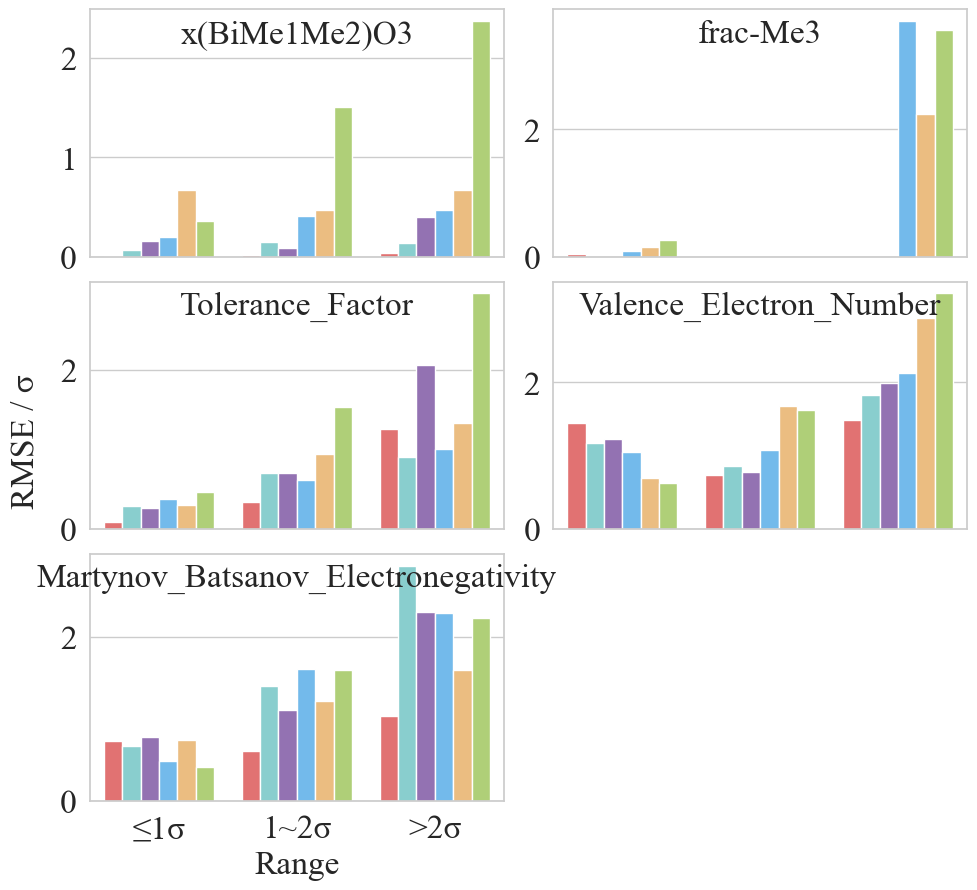

In [20]:
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#5FBDFF", "#FDBF6F", "#B3DE69", "#FFC0D9"])

cols = 2
rows = len(missing_columns) // cols if len(missing_columns) % cols == 0 else len(missing_columns) // cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharex=True)
axs = axs.flatten()

all_df = pd.DataFrame(columns=["RMSE", "Method", "Range", "Col"])

for col in missing_columns:
    ax = axs[missing_columns.index(col)]
    df = pd.DataFrame(columns=["RMSE", "Method", "Range"])

    col_mean = X[col].mean()
    col_std = X[col].std()
    # 统计在填充前缺失值在一个std距离内的缺失值
    col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
    col_missing_values = X_with_nan.loc[col_missing_index, col]
    original_values = X.loc[col_missing_index, col]
    count = {"1": [], "2": [], "3": []}
    for idx, val in zip(col_missing_index, original_values):
        if abs(val - col_mean) > 2 * col_std:
            count["3"].append(idx)
        elif abs(val - col_mean) > 1 * col_std:
            count["2"].append(idx)
        else:
            count["1"].append(idx)
    col_mean = abs(col_mean)
    score_std = rmse(original_values[count["1"]], X_filled_et.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_et.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_et.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"et: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MatImpute", "MatImpute", "MatImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_hyper.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_hyper.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_hyper.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"hyper: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["HyperImpute", "HyperImpute", "HyperImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_missforest.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_missforest.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_missforest.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"missforest: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MissForest", "MissForest", "MissForest"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_gain.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_gain.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_gain.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"gain: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Gain", "Gain", "Gain"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_sinkhorn.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_sinkhorn.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_sinkhorn.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"sinkhorn: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Sinkhorn", "Sinkhorn", "Sinkhorn"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    # mean
    score_std = rmse(original_values[count["1"]], X_filled_mean.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_mean.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_mean.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"mean: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Mean", "Mean", "Mean"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)
    df["Col"] = [col] * df.shape[0]
    all_df = pd.concat([all_df, df], ignore_index=True)

    df.drop(columns=["Col"], inplace=True)

    sns.barplot(x="Range", y="RMSE", hue="Method", data=df, ax=ax, palette=my_palette)
    # del legend
    ax.get_legend().remove()
    # del y label
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    # set x label size
    ax.set_xlabel("Range", fontsize=24)
    # 把标题添加到图的框内
    ax.text(0.5, 0.9, col, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)

# get legend
handles, labels = ax.get_legend_handles_labels()

# del empty subplot
for i in range(len(missing_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
fig.text(0.02, 0.5, 'RMSE / σ', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(hspace=0.1, wspace=0.12, left=0.1, bottom=0.1)
# plt.savefig("std-rmse.png", dpi=300)
all_df.to_excel("std-rmse-bala-cls.xlsx", index=False)